In [1]:
### Extract PDFs max pbb velocity along time
### YYE @ oct. 2023
import math


import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

In [2]:
## With help of ChatGPT, we design 
def findmaxpdf(filename):
    # Open the text file for reading
    with open(filename, 'r') as file:
        # Initialize a variable to track the current section
        current_section = None
        # Initialize a dictionary to store the data for each section
        data = {}

        # Iterate through each line in the file
        for line in file:
            # Check if the line contains an index marker (e.g., "#   1")
            if line.startswith("#   "): ## Added spaces manually.
                # Extract the section number
                section_number = int(line.split()[1])
                current_section = section_number
                # Initialize a list for the current section
                data[current_section] = []
            elif current_section is not None:
                # Split the line by the comma to separate the two values
                values = line.strip().split(', ')
                if (not(values == [''])): ## Avoid blank line. Added manually
                    # Convert the values to the appropriate data types (float, float)
                    velocity = float(values[0].strip())
                    probability = float(values[1].replace(',', ''))  # Remove space from the probability. Added manually.
                    # Add the values as a pair (velocity, probability) to the data for the current section
                    data[current_section].append((velocity, probability))

    # Now, you have your data stored in a dictionary as described in the previous response.

    # Find the velocityposition with the maximal probability in each section
    max_velocitys = {}
    for section_number, section_data in data.items():
        max_probability = -float('inf')  # Initialize with negative infinity
        max_velocity = None
        for velocity, probability in section_data:
            if probability > max_probability:
                max_probability = probability
                max_velocity = velocity
        max_velocitys[section_number] = max_velocity

    # Now, max_velocitys is a dictionary where each key is a section number, and the corresponding value is the velocity with the maximal probability in that section.
    # You can access this information as needed.
    testmm = []
    for section_number, velocity in max_velocitys.items():
        #print(f"Section {section_number}: Max velocity = {velocityposition}")
        testmm.append(velocity)
    return testmm

In [3]:
## 25/10/2023 morning
def findmean(filename):
    # Open the text file for reading
    with open(filename, 'r') as file:
        # Initialize a variable to track the current section
        current_section = None
        # Initialize a dictionary to store the data for each section
        data = {}

        # Iterate through each line in the file
        for line in file:
            # Check if the line contains an index marker (e.g., "#   1")
            if line.startswith("#   "): ## Added spaces manually.
                # Extract the section number
                section_number = int(line.split()[1])
                current_section = section_number
                # Initialize a list for the current section
                data[current_section] = []
            elif current_section is not None:
                # Split the line by the comma to separate the two values
                values = line.strip().split(', ')
                if (not(values == [''])): ## Avoid blank line. Added manually
                    # Convert the values to the appropriate data types (float, float)
                    velocity = float(values[0].strip())
                    probability = float(values[1].replace(',', ''))  # Remove space from the probability. Added manually.
                    # Add the values as a pair (velocity, probability) to the data for the current section
                    data[current_section].append((velocity, probability))

    # Now, you have your data stored in a dictionary as described in the previous response.

    # Find the velocityposition with the maximal probability in each section
    mean_velocitys = {}
    for section_number, section_data in data.items():
        mean_velocity = 0.0
        sum_pbb = 0.0
        for velocity, probability in section_data:
            mean_velocity += velocity * probability
            sum_pbb += probability
        if (sum_pbb == 0.0): ## Note, index = 200, all pbb = 0.0
            sum_pbb = 1.0
        mean_velocity /= sum_pbb
        mean_velocitys[section_number] = mean_velocity

    testmm = []
    for section_number, velocity in mean_velocitys.items():
        testmm.append(velocity)
    return testmm

In [4]:
## 25/10/2023 morning.
def finddist(filename):
    # Open the text file for reading
    with open(filename, 'r') as file:
        # Initialize a variable to track the current section
        current_section = None
        # Initialize a dictionary to store the data for each section
        data = {}

        # Iterate through each line in the file
        for line in file:
            # Check if the line contains an index marker (e.g., "#   1")
            if line.startswith("#   "): ## Added spaces manually.
                # Extract the section number
                section_number = int(line.split()[1])
                current_section = section_number
                # Initialize a list for the current section
                data[current_section] = []
            elif current_section is not None:
                # Split the line by the comma to separate the two values
                values = line.strip().split(', ')
                if (not(values == [''])): ## Avoid blank line. Added manually
                    # Convert the values to the appropriate data types (float, float)
                    velocity = float(values[0].strip())
                    probability = float(values[1].replace(',', ''))  # Remove space from the probability. Added manually.
                    # Add the values as a pair (velocity, probability) to the data for the current section
                    data[current_section].append((velocity, probability))

    # Now, you have your data stored in a dictionary as described in the previous response.
    return data

In [5]:
### Define files' parameters.
path_absolu = "sim-pdf1/"
num_file = 9
time_max = 200
num_vdis = 60
suffix = "-d_0-PDF_vzt.txt"

In [6]:
%%time
PDFv = np.zeros((num_file,time_max))
for i in range(num_file):
    name = path_absolu+"k_"+str(i)+suffix
    PDFv[i] = findmaxpdf(name)
    
PDFt = np.linspace(0,time_max-1,time_max)

CPU times: user 187 ms, sys: 7.32 ms, total: 194 ms
Wall time: 201 ms


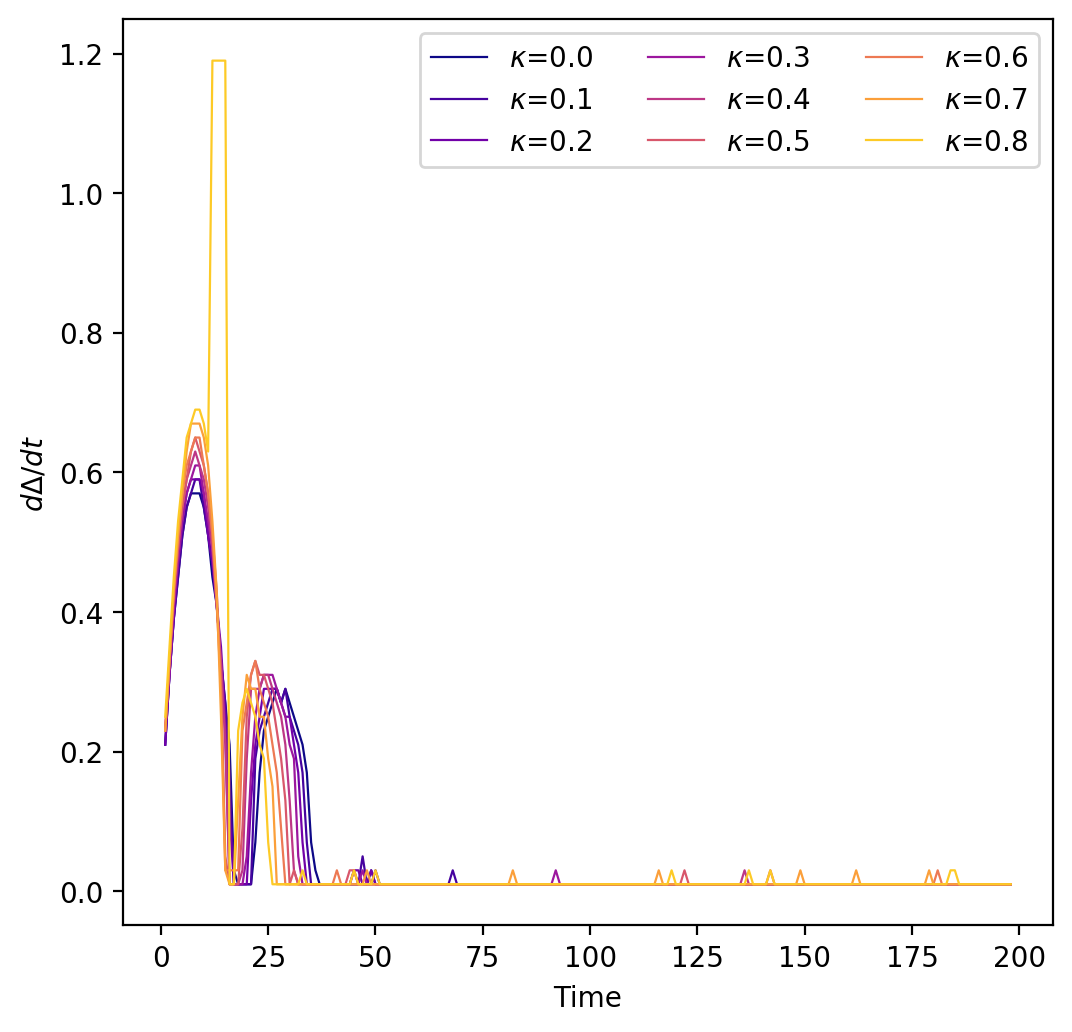

In [7]:
### Now show the evolution of max velocity along time.
plt.figure(figsize=(6,6),dpi=200)
plt.xlabel("Time")
plt.ylabel(r'$d{\Delta}/dt$')

# Get a list of different colormaps
colormaps = [ plt.get_cmap('plasma')]


for i in range(num_file):
    # Choose a colormap for this curve (cyclically from the list)
    colormap = colormaps[i % len(colormaps)]
    
    # Get the color for this curve
    color = colormap(i / num_file)  # Adjust color based on velocity in the loop

    plt.plot(PDFt[1:time_max-1],PDFv[i][1:time_max-1],label=r'$\kappa$'+"=0."+str(i),color=color,linewidth=0.8)
    
plt.legend(ncol=3)
plt.show
plt.savefig("PDFvmm.pdf",  dpi='figure', format=None, metadata=None,bbox_inches=None, pad_inches=0.1,backend=None)

In [8]:
%%time
PDFv = np.zeros((num_file,time_max))
for i in range(num_file):
    name = path_absolu+"k_"+str(i)+suffix
    PDFv[i] = findmean(name)
    
PDFt = np.linspace(0,time_max-1,time_max)

CPU times: user 159 ms, sys: 4.47 ms, total: 164 ms
Wall time: 161 ms


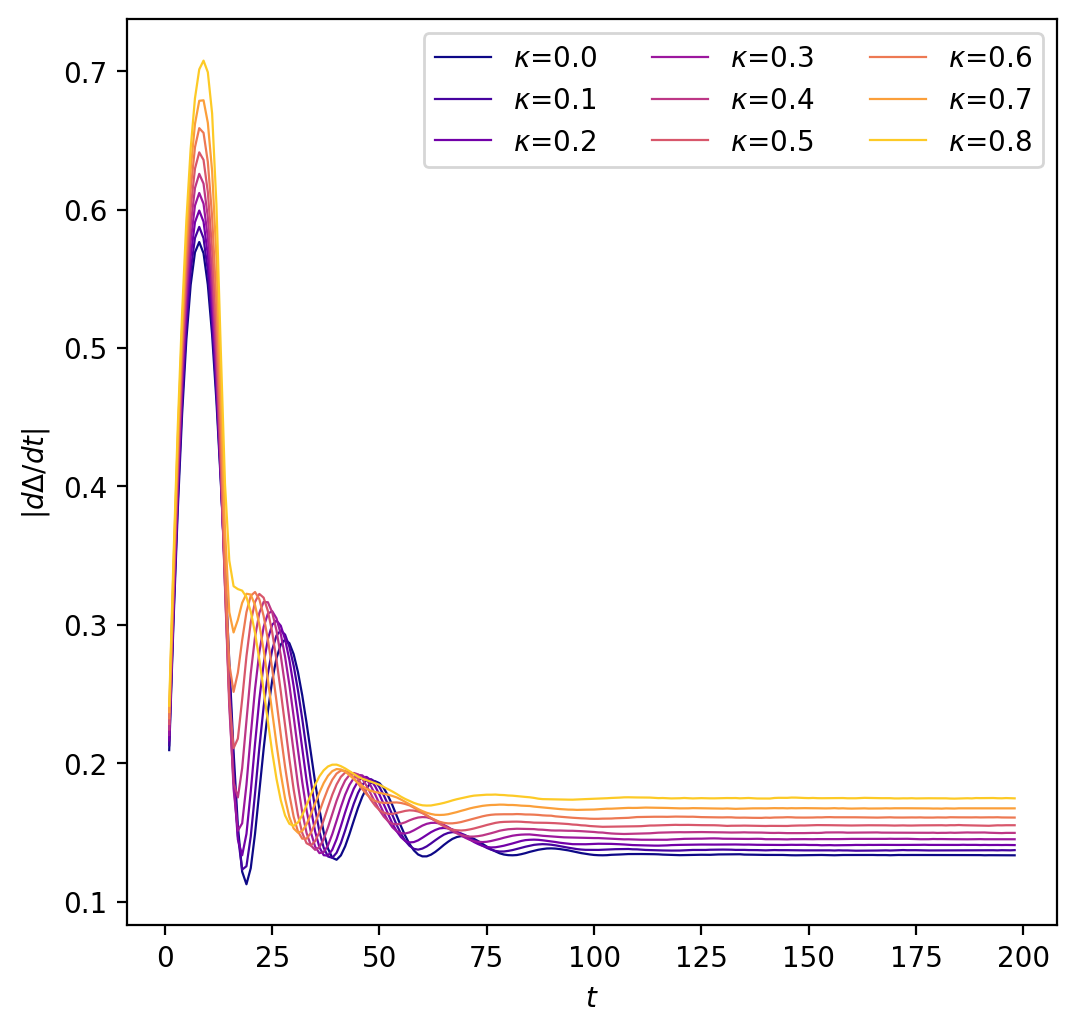

In [9]:
### Now show the evolution of max velocity along time.
plt.figure(figsize=(6,6),dpi=200)
plt.xlabel(r'$t$')
plt.ylabel(r'$|d{\Delta}/dt$|')

# Get a list of different colormaps
colormaps = [ plt.get_cmap('plasma')]


for i in range(num_file):
    # Choose a colormap for this curve (cyclically from the list)
    colormap = colormaps[i % len(colormaps)]
    
    # Get the color for this curve
    color = colormap(i / num_file)  # Adjust color based on velocity in the loop

    plt.plot(PDFt[1:time_max-1],PDFv[i][1:time_max-1],label=r'$\kappa$'+"=0."+str(i),color=color,linewidth=0.8)
    
plt.legend(ncol=3)
plt.show
plt.savefig("PDFvmm.pdf",  dpi='figure', format=None, metadata=None,bbox_inches=None, pad_inches=0.1,backend=None)

In [10]:
## Read "GBvdist.txt"
with open(path_absolu+"GBvdist.txt", 'r') as file:
    # Initialize a variable to track the current section
    current_section = None
    # Initialize a dictionary to store the data for each section
    GBv = {}
    

    # Iterate through each line in the file
    for line in file:
        # Check if the line contains an index marker (e.g., "#   1")
        if line.startswith("  ##"): ## Added spaces manually.
            # Initialize a list for the current section
            GBv = []
            current_section = 1
        elif current_section is not None:
            # Split the line by the comma to separate the two values
            values = line.strip().split(', ')
            if (not(values == [''])): ## Avoid blank line. Added manually
                # Convert the values to the appropriate data types (float, float)
                velocity = float(values[0].strip())
                probability = float(values[2].replace(',', ''))  # Remove space from the probability. Added manually.
                # Add the values as a pair (velocity, probability) to the data for the current section
                GBv.append((velocity, probability))

In [11]:
fac_nrmlz = np.trapz(GBv[:][0],GBv[:][1])
print(fac_nrmlz)

12522282.619500002


In [12]:
np.trapz(GBv[:][0],GBv[:][1]/fac_nrmlz)

0.9999999999999998

In [13]:
### Extract theoretical expectations.
dist_vite = np.zeros(num_vdis)
dist_theo = np.zeros(num_vdis)
for i in range(num_vdis):
    dist_vite[i] = GBv[i][0]
    dist_theo[i] = GBv[i][1]
###

In [14]:
dist_theo

array([5.04208e+03, 4.96713e+03, 4.82056e+03, 4.60878e+03, 4.34079e+03,
       4.02762e+03, 3.68150e+03, 3.31509e+03, 2.94079e+03, 2.56996e+03,
       2.21251e+03, 1.87647e+03, 1.56781e+03, 1.29044e+03, 1.04636e+03,
       8.35836e+02, 6.57743e+02, 5.09902e+02, 3.89416e+02, 2.92979e+02,
       2.17147e+02, 1.58551e+02, 1.14046e+02, 8.08138e+01, 5.64141e+01,
       3.87959e+01, 2.62833e+01, 1.75416e+01, 1.15334e+01, 7.47030e+00,
       4.76668e+00, 2.99633e+00, 1.85549e+00, 1.13194e+00, 6.80277e-01,
       4.02757e-01, 2.34907e-01, 1.34973e-01, 7.63996e-02, 4.26022e-02,
       2.34029e-02, 1.26649e-02, 6.75198e-03, 3.54614e-03, 1.83475e-03,
       9.35177e-04, 4.69576e-04, 2.32282e-04, 1.13193e-04, 5.43400e-05,
       2.56990e-05, 1.19731e-05, 5.49536e-06, 2.48474e-06, 1.10678e-06,
       4.85664e-07, 2.09946e-07, 8.94079e-08, 3.75094e-08, 1.55024e-08])

In [15]:
dist_vite

array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21,
       0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43,
       0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65,
       0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85, 0.87,
       0.89, 0.91, 0.93, 0.95, 0.97, 0.99, 1.01, 1.03, 1.05, 1.07, 1.09,
       1.11, 1.13, 1.15, 1.17, 1.19])

In [16]:
%%time
### Extract all final velocity
dist_final = np.zeros((num_file,num_vdis))


for i in range(num_file):
    name = path_absolu+"k_"+str(i)+suffix
    int_data = finddist(name)[time_max-1]
    for j in range(num_vdis):
        dist_final[i,j] = int_data[j][1]
### END

CPU times: user 169 ms, sys: 4.4 ms, total: 174 ms
Wall time: 172 ms


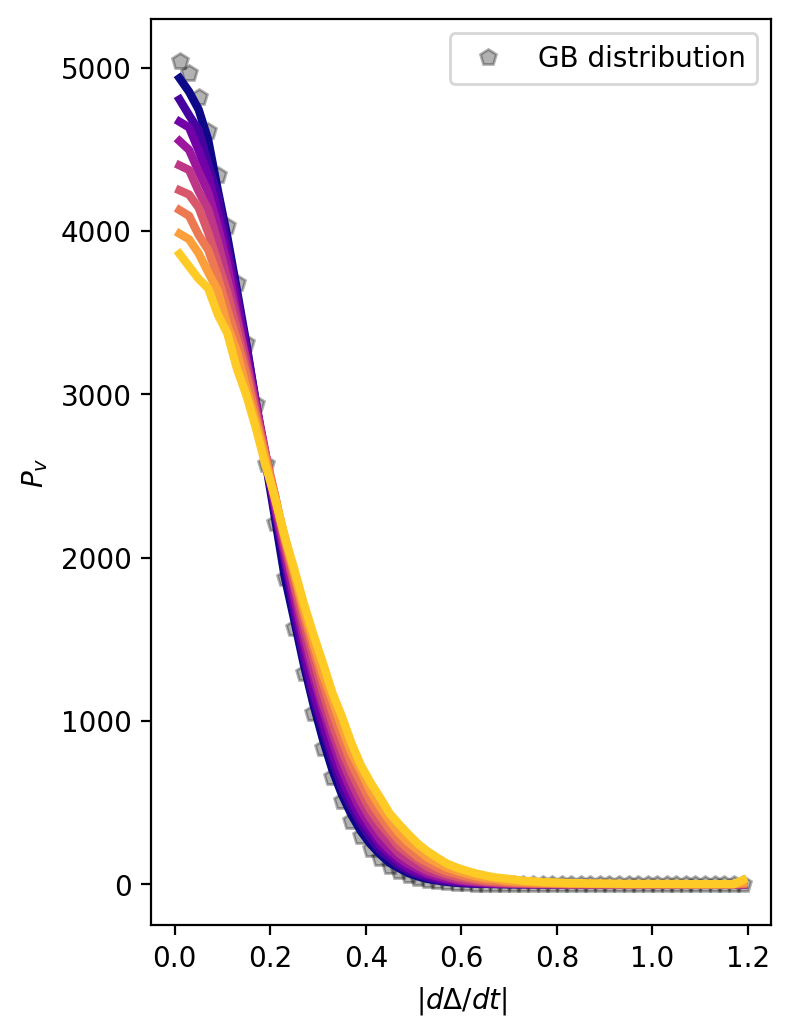

In [17]:
### Now show the evolution of mean height along time.
plt.figure(figsize=(4,6),dpi=200)
plt.ylabel(r"$P_v$")
plt.xlabel(r'$|d\Delta/dt|$')

plt.plot(dist_vite,dist_theo,'p',label="GB distribution",linewidth=0.1,color='black',alpha=0.3)



# Get a list of different colormaps
colormaps = [plt.get_cmap('plasma')]


for i in range(num_file):
    # Choose a colormap for this curve (cyclically from the list)
    colormap = colormaps[i % len(colormaps)]
    
    # Get the color for this curve
    color = colormap(i / num_file)  # Adjust color based on velocity in the loop

    plt.plot(dist_vite,dist_final[i],c=color,linewidth=3)

    
plt.legend(ncol=2)
plt.show
plt.savefig("PDF_vf.pdf",  dpi='figure', format=None, metadata=None,bbox_inches=None, pad_inches=0.1,backend=None)




In [18]:
grav = 9.80665
rayon = 1.0e-6
rhosty = 1.05e3
rhosol = 1.00e3
rhoa = (1.0e0-rhosol/rhosty)
clight = np.sqrt(2.0e0*grav*rayon*rhoa)
print(clight)

0.000966419508633113


In [19]:
### Add initial conditions

for i in range(num_file):
    for j in range(time_max-1,0,-1):
        PDFv[i][j] = PDFv[i][j-1]
    PDFv[i][0] = 0.0
### END

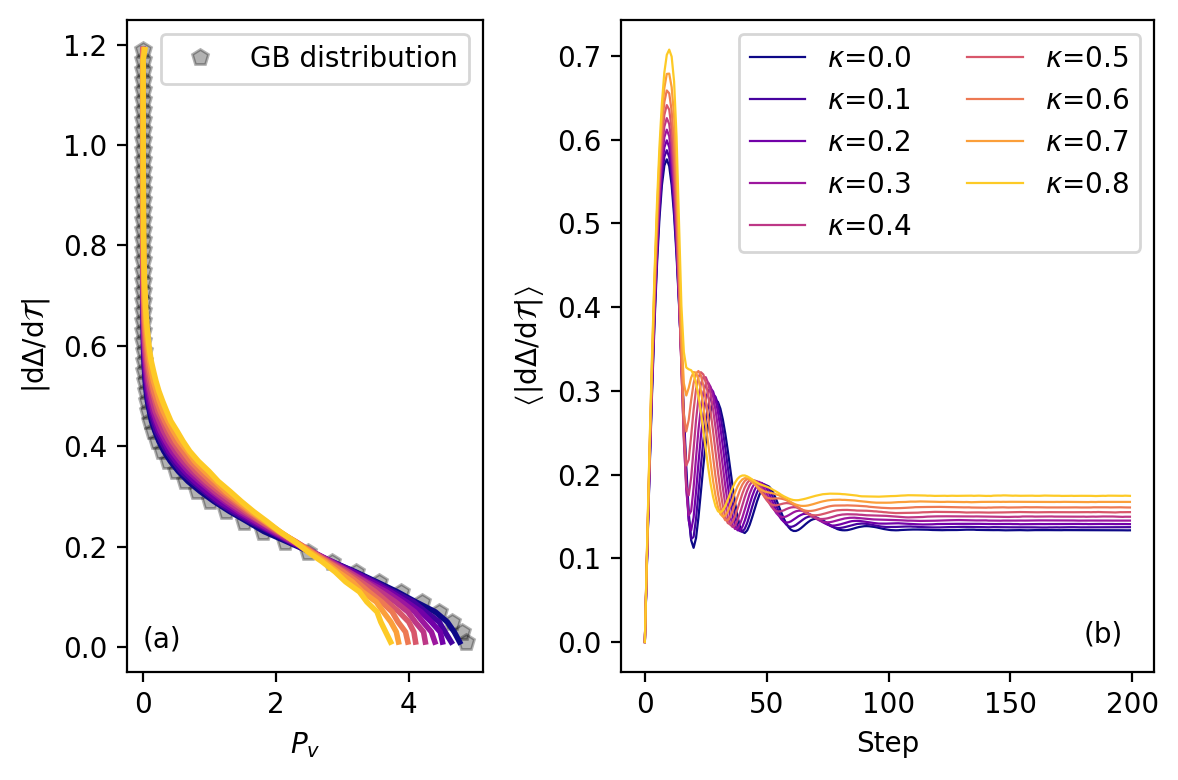

In [23]:
# Plot TWO figures together!
f, (a1, a0) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [4, 6]}, dpi=200)


### Now show the evolution of mean height along time. [Right]
a0.set_xlabel("Step")
#a0.set_xlabel(r'$\mathcal{T}$')
a0.set_ylabel(r'$\left\langle \left\vert \mathrm{d}\Delta/\mathrm{d}\mathcal{T} \right\vert \right\rangle$')
a0.text(180,0.0,"(b)")


# Get a list of different colormaps
colormaps = [ plt.get_cmap('plasma')]

for i in range(num_file):
    # Choose a colormap for this curve (cyclically from the list)
    colormap = colormaps[i % len(colormaps)]
    # Get the color for this curve
    color = colormap(i / num_file)  # Adjust color based on position in the loop
    # Draw each curve of mean position
    a0.plot(PDFt,PDFv[i],label=r'$\kappa$'+"=0."+str(i),linewidth=0.8,c=color)
## Show legends.
a0.legend(ncol=2)






### Now show GB distribution. [Left]
a1.set_xlabel(r'$P_v$')
a1.set_ylabel(r'$\left\vert \mathrm{d}\Delta/\mathrm{d}\mathcal{T} \right\vert$')
a1.text(0.0,0.0,"(a)")

a1.plot(dist_theo*clight,dist_vite,'p',label="GB distribution",linewidth=0.1,color='black',alpha=0.3)
for i in range(num_file):
    # Choose a colormap for this curve (cyclically from the list)
    colormap = colormaps[i % len(colormaps)]
    # Get the color for this curve
    color = colormap(i / num_file)  # Adjust color based on velocity in the loop
    # Draw velocity GB numerical distribution
    a1.plot(dist_final[i]*clight,dist_vite,c=color,linewidth=2)
a1.legend(ncol=2)




f.tight_layout()
f.savefig('PDFv_ens.pdf')

In [21]:
np.trapz(GBv[:][1],GBv[:][0])*clight

12101.876395723102

In [22]:
np.trapz(GBv[:][0],GBv[:][1])

12522282.619500002